<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/Imbalanced_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced Learning

**Agenda**

<ul>
  <li>Introduction to Imbalanced Learning</li>
<ul>
  <li>Challenges with Imabalanced Data</li>
  <li>Importance of Adressing Imbalance</li>
</ul>
  <li>Exploring Data</li>
  <li>Model Preparation</li>
  <li>Balancing</li>
<ul>
  <li>Undersampling</li>
  <li>Tomek Links Sampling</li>
  <li>SMOTE</li>
  <li>ADASYN</li>
  <li>SMOTE ENN</li>
  <li>SMOTE TOMEK</li>
</ul>
</ul>

## Introduction to Imbalanced Learning

<ul>
  <li>Imbalanced learning is a subfield of machine learning that deals with classification problems where the distribution of classes is skewed or imbalanced. </li>
  <li>In such scenarios, the number of examples in one class (the minority class) is significantly smaller than the number of examples in the other class (the majority class).</li>
  <li>Imbalanced learning techniques aim to address this issue by improving the performance of classifiers on the minority class, which is often of greater interest.</li>
</ul>

<ul>
  <li>Imbalanced learning refers to classification tasks where one class is significantly more prevalent than the other(s).</li>
  <li>Examples:</li>
<ul>
  <li>Fraud detection: The number of fraudulent transactions is much lower than legitimate ones.</li>
  <li>Medical diagnosis: Rare diseases have fewer positive cases compared to negative ones.</li>
</ul>
</ul>


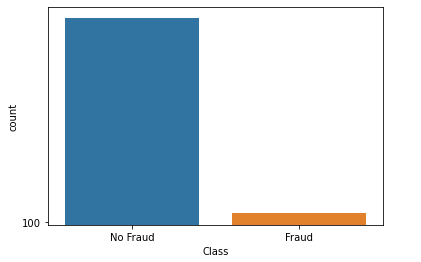

### Challenges with Imbalanced Data

<ul>
  <li>Imbalanced datasets are characterized by a significant disparity in the distribution of classes, with one class being much more prevalent than the others.</li>
  <li>In classification tasks, where the goal is to categorize data into distinct classes, imbalanced datasets present challenges for machine learning models.</li>
  <li>Since the majority class dominates the dataset, models tend to be biased towards predicting this class, neglecting the minority class.</li>
  <li>As a result, models may struggle to accurately capture the patterns and characteristics of the minority class, leading to poor performance in detecting and classifying instances belonging to that class.</li>
</ul>

#### **Bias towards Majority Class**

<ul>
  <li>Models trained on imbalanced data are prone to developing a bias towards the majority class due to its overwhelming presence in the dataset.</li>
  <li>The model's tendency to prioritize accuracy can lead it to optimize for predicting the majority class accurately, even at the expense of neglecting the minority class.</li>
  <li>This bias can manifest in various ways, such as assigning higher importance to features that discriminate the majority class while overlooking those relevant to the minority class.</li>
</ul>

#### **Misleading Accuracy Metrics**

<ul>
  <li>Traditional evaluation metrics like accuracy can be misleading when applied to imbalanced datasets.</li>
  <li>Accuracy measures the proportion of correctly classified instances out of the total instances, making it susceptible to bias in favor of the majority class.</li>
  <li>In imbalanced datasets, a model that simply predicts the majority class for all instances can achieve high accuracy, even though it fails to capture the nuances of the minority class.</li>
  <li>As a result, accuracy alone may not provide an accurate assessment of a model's performance, especially in scenarios where detecting the minority class is of critical importance.</li>
</ul>

### Importance of Addressing Imbalance

#### **Developing Accurate Models for Minority Class Identification**

<ul>
  <li>In imbalanced datasets, the minority class often represents rare or critical events, such as fraudulent transactions in credit card data.</li>
  <li>The primary objective is to develop machine learning models that can accurately identify instances belonging to the minority class.</li>
  <li>By accurately detecting minority class instances, models can provide valuable insights and predictions that would otherwise be overlooked or misclassified.</li>
  <li>Achieving high accuracy in identifying the minority class is essential for effectively addressing specific challenges and risks associated with these rare events.</li>
</ul>

#### **Preventing or Mitigating Potential Risks**

<ul>
  <li>Effective detection of minority class instances, such as fraudulent transactions, can help prevent or mitigate potential risks and losses associated with these events.</li>
  <li>In the context of credit card fraud detection, timely identification of fraudulent transactions enables proactive measures to be taken, such as blocking transactions, alerting customers, and investigating suspicious activities.</li>
  <li>By intervening early and accurately identifying fraudulent activities, financial institutions and businesses can minimize financial losses, protect customer assets, and maintain trust and credibility with their clientele.</li>
  <li>Furthermore, addressing imbalanced data and developing robust models for minority class identification can enhance overall security measures and risk management strategies in various industries and domains beyond finance, including healthcare, cybersecurity, and fraud detection in online platforms.</li>
</ul>

## Exploring Data

In [ ]:
import pandas as pd
import numpy as np
from numpy import argmax

from datetime import date, time, timedelta
# import pendulum

import matplotlib.pyplot as plt
import seaborn as sns

# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve


In [ ]:
# Importing the necessary function from the google.colab library
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive')

# - This code imports the `drive` function from the google.colab library.
# - The `drive.mount()` function is then called with the argument '/content/drive', which mounts the Google Drive to the Colab environment.
# - This allows access to files stored in Google Drive within the Colab notebook environment.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Imbalanced Learning/orders.csv')

In [ ]:
df.head()

,Unnamed,Order_id,created_at,city,category_name,experience_date,product_id,product_name,amount,device,...,created_dow_sin,created_dow_cos,created_wom_sin,created_wom_cos,experience_dom_sin,experience_dom_cos,experience_dow_sin,experience_dow_cos,experience_won_sin,experience_won_cos
0,1,770487,2023-06-25 12:14:15.557989,Paris,Electronics,2023-05-15 12:14:15.771953,4970,iPhone,628.81,Mobile,...,0.375500,0.705394,-0.905434,-0.273447,0.707653,0.425748,-0.575853,-0.808221,0.040452,0.178087
1,2,216739,2023-09-28 12:14:15.557989,Tokyo,Books,2023-06-07 12:14:15.771953,7088,iPhone,464.88,Desktop,...,0.857856,0.495186,0.916600,0.810292,-0.859345,0.294347,0.114869,-0.032282,-0.752485,-0.675381
2,3,126225,2024-02-11 12:14:15.557989,New York,Books,2023-08-05 12:14:15.771953,7007,T-shirt,694.71,Mobile,...,-0.233003,0.173498,-0.872895,-0.320916,0.050905,-0.054044,0.532707,0.817989,-0.205103,-0.310171
3,4,877572,2023-04-05 12:14:15.557989,Tokyo,Home & Garden,2023-05-18 12:14:15.771953,1987,Novel,737.68,Mobile,...,-0.021948,0.961071,-0.394675,0.878678,-0.990876,0.012010,-0.066566,0.785049,0.054014,-0.481702
4,5,388389,2023-09-06 12:14:15.557989,New York,Books,2023-04-08 12:14:15.771953,3710,T-shirt,149.38,Tablet,...,-0.343628,0.575324,-0.557566,0.313063,-0.773222,0.348924,0.811246,0.270197,-0.323929,0.403466


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76829 entries, 0 to 76828
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed                        76829 non-null  int64  
 1   Order_id                       76829 non-null  int64  
 2   created_at                     76829 non-null  object 
 3   city                           76829 non-null  object 
 4   category_name                  76743 non-null  object 
 5   experience_date                76829 non-null  object 
 6   product_id                     76829 non-null  int64  
 7   product_name                   76829 non-null  object 
 8   amount                         76829 non-null  float64
 9   device                         76829 non-null  object 
 10  payment_id                     76829 non-null  int64  
 11  customer_ip                    76829 non-null  object 
 12  customer_id                    76829 non-null 

### Dataset Overview

<ul>
  <li>The dataset comprises various features related to credit card transactions, providing details about each transaction.</li>
  <li>The dataset aims to capture various attributes and characteristics of credit card transactions, facilitating the analysis and modeling of transaction data.</li>
</ul>

In [ ]:
df.columns

Index(['Unnamed', 'Order_id', 'created_at', 'city', 'category_name',
       'experience_date', 'product_id', 'product_name', 'amount', 'device',
       'payment_id', 'customer_ip', 'customer_id', 'payment_method',
       'payment_method_provider', 'payment_method_bin', 'payment_method_type',
       'payment_method_product', 'payment_method_card_category',
       'payment_method_issuer_bank', 'payment_method_issuer_country',
       'is_fraudulent', 'time_dif', 'created_at_hod_sin', 'created_at_hod_cos',
       'created_dom_sin', 'created_dom_cos', 'created_dow_sin',
       'created_dow_cos', 'created_wom_sin', 'created_wom_cos',
       'experience_dom_sin', 'experience_dom_cos', 'experience_dow_sin',
       'experience_dow_cos', 'experience_won_sin', 'experience_won_cos'],
      dtype='object')

In [ ]:
# This line of code is counting the occurrences of different values in the 'is_fraudulent' column of the DataFrame 'df',
# and then normalizing the counts to get proportions instead of raw counts. It's useful for understanding the distribution
# of fraudulent vs. non-fraudulent cases in the dataset.
df.is_fraudulent.value_counts(normalize=True)

0.0    0.986958
1.0    0.013042
Name: is_fraudulent, dtype: float64

<ul>
  <li>Upon exploring the target variable 'is_fraudulent,' it is evident that the dataset exhibits a highly imbalanced distribution.</li>
  <li>The majority class consists of genuine transactions, accounting for approximately 98.6% of the dataset.</li>
  <li>In contrast, the minority class comprises fraudulent transactions, representing only about 1.3% of the dataset.</li>
  <li>This imbalance in class distribution indicates that the dataset is heavily skewed towards genuine transactions, making it challenging to train machine learning models to accurately detect and classify fraudulent transactions.</li>
  <li>Addressing the class imbalance in the dataset is crucial for developing effective models that can adequately capture the characteristics of both genuine and fraudulent transactions, thereby improving fraud detection accuracy and mitigating risks associated with fraudulent activities.</li>
</ul>

### Data Preprocessing Step

#### **Removal of Irrelevant Column**

<ul>
  <li>Certain columns in the dataset serve as unique identifiers or contain irrelevant information for modeling purposes. These columns do not contribute to the predictive power of the model and can be safely removed.</li>
  <li>Examples of columns typically considered irrelevant include:</li>
<ul>
  <li>Order ID: A unique identifier for each transaction, which does not provide meaningful insights for predicting fraud.</li>
  <li>Creation Timestamp: The timestamp indicating when the transaction was created, which may not be relevant for fraud detection.</li>
  <li>Unnamed Columns: Columns without meaningful names or containing redundant information.</li>
</ul>
  <li>By removing these irrelevant columns, we streamline the dataset and reduce unnecessary noise, focusing only on features that are relevant for modeling and analysis.</li>
</ul>

In [ ]:
# This line of code is dropping three columns ('Unnamed', 'Order_id', 'created_at') from the DataFrame 'df'.
# The 'axis=1' parameter specifies that the operation is to be performed along columns, and 'inplace=True'
# means that the changes will be made directly to the DataFrame 'df' rather than creating a new DataFrame.
df.drop(['Unnamed', 'Order_id', 'created_at', 'experience_date'], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76829 entries, 0 to 76828
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           76829 non-null  object 
 1   category_name                  76743 non-null  object 
 2   product_id                     76829 non-null  int64  
 3   product_name                   76829 non-null  object 
 4   amount                         76829 non-null  float64
 5   device                         76829 non-null  object 
 6   payment_id                     76829 non-null  int64  
 7   customer_ip                    76829 non-null  object 
 8   customer_id                    76829 non-null  int64  
 9   payment_method                 76829 non-null  object 
 10  payment_method_provider        76829 non-null  object 
 11  payment_method_bin             76778 non-null  float64
 12  payment_method_type            76784 non-null 

In [ ]:
# This line of code is calculating the number of unique values in each column of the DataFrame 'df'.
# It returns a Series where the index consists of column names and the values represent the number of unique values in each column.
df.nunique()

city                                 4
category_name                        4
product_id                        8998
product_name                         4
amount                           53398
device                               3
payment_id                       73660
customer_ip                      76829
customer_id                       9000
payment_method                       3
payment_method_provider              4
payment_method_bin               73654
payment_method_type                  2
payment_method_product               3
payment_method_card_category         3
payment_method_issuer_bank           4
payment_method_issuer_country        4
is_fraudulent                        2
time_dif                         76829
created_at_hod_sin               76829
created_at_hod_cos               76829
created_dom_sin                  76829
created_dom_cos                  76829
created_dow_sin                  76829
created_dow_cos                  76829
created_wom_sin          

In [ ]:
# This code block checks for duplicate rows in the DataFrame 'df'.
# It compares the number of rows in the original DataFrame ('df.shape[0]') with the number of rows in a DataFrame
# obtained by dropping duplicate rows ('df.drop_duplicates().shape[0]'). If they are equal, it prints 'No duplicates found',
# indicating that there are no duplicate rows in the DataFrame. Otherwise, it calculates the number of duplicate rows
# and prints the count.
if df.shape[0] == df.drop_duplicates().shape[0]:
    print('No duplicates found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} found duplicates'.format(duplicates))

No duplicates found


#### Handling Missing Values

In [ ]:
# This line of code calculates the sum of missing (NaN) values in each column of the DataFrame 'df'.
# It returns a Series where the index consists of column names and the values represent the number of missing values in each column.
df.isna().sum() # missing values

city                                0
category_name                      86
product_id                          0
product_name                        0
amount                              0
device                              0
payment_id                          0
customer_ip                         0
customer_id                         0
payment_method                      0
payment_method_provider             0
payment_method_bin                 51
payment_method_type                45
payment_method_product           2098
payment_method_card_category     2601
payment_method_issuer_bank       3139
payment_method_issuer_country      99
is_fraudulent                     309
time_dif                            0
created_at_hod_sin                  0
created_at_hod_cos                  0
created_dom_sin                     0
created_dom_cos                     0
created_dow_sin                     0
created_dow_cos                     0
created_wom_sin                     0
created_wom_

In [ ]:
df.is_fraudulent.value_counts(normalize=True)

0.0    0.986958
1.0    0.013042
Name: is_fraudulent, dtype: float64

In [ ]:
# Drop columns from the DataFrame
# The 'drop' method is used to remove specified columns from the DataFrame.
# The 'axis' parameter is set to 1 to indicate that we are dropping columns (0 for rows).
# The 'inplace' parameter is set to True to modify the DataFrame in place without returning a new DataFrame.

df.drop(['city','category_name', 'payment_method_bin', 'payment_method_type',
         'payment_method_product', 'payment_method_card_category',
         'payment_method_issuer_bank', 'payment_method_issuer_country'],
        axis=1, inplace=True)

In [ ]:
df['is_fraudulent'].fillna(0, inplace=True)

In [ ]:
print(df['is_fraudulent'].value_counts())

0.0    75831
1.0      998
Name: is_fraudulent, dtype: int64


In [ ]:
# Split the DataFrame into features (X) and target variable (y)
# The 'drop' method is used to remove the column specified in the 'is_fraudulent' list from the DataFrame.
# The 'axis' parameter is set to 1 to indicate that we are dropping columns (0 for rows).
# This operation creates a new DataFrame containing all columns except the 'is_fraudulent' column, which is assigned to variable X.

X = df.drop(["is_fraudulent"], axis=1)

# Extract the target variable (y)
# The target variable 'is_fraudulent' is assigned to variable y.
# This operation creates a pandas Series containing the values of the 'is_fraudulent' column.

y = df["is_fraudulent"]

In [ ]:
X.shape

(76829, 24)

In [ ]:
y.shape

(76829,)

In [ ]:
# dropping remaining not needed columns
X = X.drop(["product_name", "payment_id", "payment_method"], axis = 1)

#### Data Encoding

##### Label Encoding

<ul>
  <li>Label Encoding involves replacing categorical values with numerical labels, assigning a unique integer to each category.</li>
  <li>The encoding process is straightforward and suitable for ordinal categorical variables where the order matters.</li>
  <li>Label Encoding does not consider the relationship between the encoded labels and the target variable.</li>
  <li>It is commonly used in machine learning algorithms that require numerical inputs, such as decision trees and random forests.</li>
  <li>However, Label Encoding may not be suitable for nominal categorical variables with no inherent order, as it could introduce unintended relationships between categories.</li>
</ul>

**Implementation Steps**

<ul>
  <li>To apply Label Encoding, use libraries like scikit-learn's LabelEncoder, which provides a simple interface for transforming categorical values into numerical labels.</li>
  <li>Before applying Label Encoding, ensure that the categorical variables are properly formatted and do not contain missing values.</li>
  <li>After encoding, the resulting numerical labels can be used as input features for training machine learning models.</li>
  <li>Evaluate the effectiveness of Label Encoding based on the specific dataset and the requirements of the machine learning task, considering potential issues such as the introduction of artificial relationships between categories.</li>
</ul>


In [ ]:
print(df['is_fraudulent'].value_counts())

0.0    75831
1.0      998
Name: is_fraudulent, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# The 'train_test_split' function is used to split the features (X) and target variable (y) into training and testing sets.
# X: Features DataFrame containing independent variables.
# y: Target Series containing the dependent variable.
# The 'test_size' parameter is set to 0.2, indicating that 20% of the data will be used for testing.
# The 'random_state' parameter is set to 1 to ensure reproducibility of the split.
# The 'stratify' parameter is set to y, ensuring that the class distribution is preserved in both training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
X_train.shape

(61463, 21)

In [ ]:
X_test.shape

(15366, 21)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


##### Target Encoding

<ul>
  <li>Target Encoding involves replacing categorical values with the average of the target variable for each category</li>
  <li>It's essential to consider whether the target variable is binary or continuous when applying Target Encoding.</li>
  <li>For binary target variables, computing the mean of the target variable for each category is straightforward.</li>
  <li>However, when the target variable has multiple values, such as in multi-class classification, the computation becomes more complex, requiring the calculation of probabilities.</li>
  <li>Data leakage is a significant risk associated with Target Encoding, where variables indirectly computed using the target variable or representing the target variable in a different form can lead to overfitting and inflated model performance.</li>
  <li>To mitigate data leakage, several approaches can be used, including cross-validation, separation of training and test data before computing target encodings, and applying normalization techniques.</li>
</ul>


**Implementation Steps**

<ul>
  <li>Preprocessing steps include dropping unnecessary columns, handling object-type columns, and standardizing numerical features using the scikit-learn library's StandardScaler.</li>
  <li>Separating training and test data using techniques like stratified splitting ensures maintaining the proportion of positive cases in both sets.</li>
  <li>The data is prepared for model training, ensuring all preprocessing steps are completed before building the model.</li>
</ul>

In [ ]:
df.columns

Index(['product_id', 'product_name', 'amount', 'device', 'payment_id',
       'customer_ip', 'customer_id', 'payment_method',
       'payment_method_provider', 'is_fraudulent', 'time_dif',
       'created_at_hod_sin', 'created_at_hod_cos', 'created_dom_sin',
       'created_dom_cos', 'created_dow_sin', 'created_dow_cos',
       'created_wom_sin', 'created_wom_cos', 'experience_dom_sin',
       'experience_dom_cos', 'experience_dow_sin', 'experience_dow_cos',
       'experience_won_sin', 'experience_won_cos'],
      dtype='object')

In [ ]:
X_train.columns

Index(['product_id', 'amount', 'device', 'customer_ip', 'customer_id',
       'payment_method_provider', 'time_dif', 'created_at_hod_sin',
       'created_at_hod_cos', 'created_dom_sin', 'created_dom_cos',
       'created_dow_sin', 'created_dow_cos', 'created_wom_sin',
       'created_wom_cos', 'experience_dom_sin', 'experience_dom_cos',
       'experience_dow_sin', 'experience_dow_cos', 'experience_won_sin',
       'experience_won_cos'],
      dtype='object')

In [ ]:
import category_encoders as ce

# Check the column names in X_train
print(X_train.columns)

# Update cols with the correct column names from X_train
cols = ['customer_ip', 'customer_id', 'device', 'product_id', 'payment_method_provider']

# Check if all columns in cols exist in X_train.columns
missing_columns = [col for col in cols if col not in X_train.columns]
if missing_columns:
    raise ValueError(f'Columns {missing_columns} are not found in X_train.columns')

# Create the TargetEncoder
ce_target = ce.TargetEncoder(cols=cols)

# Fit and transform X_train
X_train = ce_target.fit_transform(X_train, y_train)

# Transform X_test
X_test = ce_target.transform(X_test)


Index(['product_id', 'amount', 'device', 'customer_ip', 'customer_id',
       'payment_method_provider', 'time_dif', 'created_at_hod_sin',
       'created_at_hod_cos', 'created_dom_sin', 'created_dom_cos',
       'created_dow_sin', 'created_dow_cos', 'created_wom_sin',
       'created_wom_cos', 'experience_dom_sin', 'experience_dom_cos',
       'experience_dow_sin', 'experience_dow_cos', 'experience_won_sin',
       'experience_won_cos'],
      dtype='object')


In [ ]:
# Define a list of continuous columns
# The list 'continuous_column' contains the names of columns that represent continuous variables in the dataset.
# These columns typically contain numerical data that can take on any value within a certain range.

continuous_column = ['amount', 'time_diff']

In [ ]:
numerical_features = [df.columns.get_loc(c) for c in continuous_column if c in X_train]

In [ ]:
print(X_train.shape)
print(y_train.shape)

(61463, 21)
(61463,)


## Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.columns

Index(['product_id', 'amount', 'device', 'customer_ip', 'customer_id',
       'payment_method_provider', 'time_dif', 'created_at_hod_sin',
       'created_at_hod_cos', 'created_dom_sin', 'created_dom_cos',
       'created_dow_sin', 'created_dow_cos', 'created_wom_sin',
       'created_wom_cos', 'experience_dom_sin', 'experience_dom_cos',
       'experience_dow_sin', 'experience_dow_cos', 'experience_won_sin',
       'experience_won_cos'],
      dtype='object')

In [ ]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0. 1.]
Unique classes in y_test: [0. 1.]


In [ ]:
X = df.drop(columns=['is_fraudulent'])
y = df['is_fraudulent']

In [ ]:
# Step 1: Using Class Weights
# Calculate class weights

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
# Initialize a Logistic Regression model with class weights
model_cw = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

In [ ]:
# Check the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (61463, 21)
Shape of y_train: (61463,)


In [ ]:
# One-hot encode categorical features in X_train
X_train_encoded = pd.get_dummies(X_train)

# Initialize and fit the model on the encoded training data
model_cw.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

## Balancing

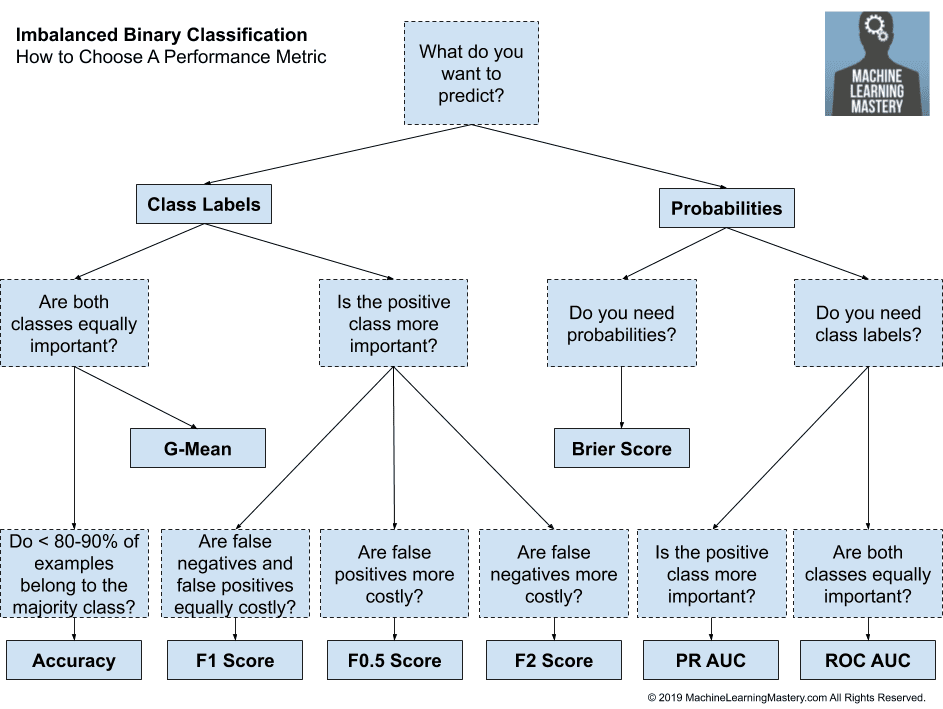

**Specificity (True Negative Rate)**

<ul>
  <li>Specificity measures the proportion of actual negatives that are correctly identified as negative by the model.</li>
  <li>It is calculated as the ratio of true negatives (TN) to the sum of true negatives and false positives (TN + FP).</li>
  <li>Formula: Specificity = TN / (TN + FP)</li>
  <li>Specificity indicates how well the model distinguishes true negatives from false positives.</li>
</ul>


**Sensitivity (True Positive Rate or Recall):**
<ul>
  <li>Sensitivity measures the proportion of actual positives that are correctly identified as positive by the model.</li>
  <li>It is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).</li>
  <li>Formula: Sensitivity = TP / (TP + FN)</li>
  <li>Sensitivity indicates how well the model identifies true positives.</li>
</ul>

**Geometric Mean:**
<ul>
  <li>The geometric mean is a measure of the central tendency of a set of numbers.</li>
  <li>In the context of binary classification evaluation, the geometric mean of specificity and sensitivity is used as a single metric to assess the overall performance of the model..</li>
  <li>It is calculated as the square root of the product of specificity and sensitivity.</li>
  <li>Formula: Geometric Mean = sqrt(Specificity * Sensitivity)</li>
  <li>The geometric mean provides a balanced assessment of the model's ability to correctly classify both positive and negative instances.</li>
</ul>

specificity and sensitivity represent the model's performance with respect to true negatives and true positives, respectively, while the geometric mean provides a single metric that considers both aspects of model performance.

### UnderSampling

<ul>
  <li>Under sampling is a crucial technique used in machine learning to address the challenge of imbalanced datasets, particularly in binary classification problems. In this technique, we focus on reducing the number of samples in the majority class to match the number of samples in the minority class, thereby achieving a more balanced dataset. One popular implementation of under sampling is the RandomUnderSampler from the imbalanced-learn package, which we'll explore in detail.</li>
</ul>

**Challenges in Dealing with Minority Class Observations:**

<ul>
  <li>Imbalanced datasets pose several challenges, especially when dealing with the minority class. These challenges include biased model predictions towards the majority class, poor generalization of the model due to the lack of representative samples from the minority class, and difficulty in capturing meaningful patterns or relationships associated with the minority class.</li>
</ul>

**Overview of the Under Sampling Process:**

<ul>
  <li>The under sampling process involves reducing the number of samples in the majority class to achieve a more balanced distribution between the classes. The RandomUnderSampler randomly selects a subset of samples from the majority class to match the number of samples in the minority class. By doing so, we mitigate the dominance of the majority class and provide the model with a more balanced training dataset.</li>
</ul>

**Example Showing Downsizing of Majority Class Observations:**

<ul>
  <li>Let's consider an example where we have a dataset with 80% of the samples belonging to the majority class (Class A) and 20% belonging to the minority class (Class B). Using the RandomUnderSampler, we randomly select a subset of samples from Class A to match the number of samples in Class B. For instance, if Class B has 100 samples, we randomly select 100 samples from Class A, effectively downsizing it to 100 samples as well. This results in a balanced dataset with an equal number of samples from both classes.</li>
</ul>

Under sampling is a valuable technique for handling imbalanced datasets by reducing the dominance of the majority class and achieving a more balanced distribution between classes. The RandomUnderSampler implementation in the imbalanced-learn package simplifies the process by randomly selecting samples from the majority class. However, it's essential to be mindful of the potential loss of information and to assess the impact of under sampling on model performance.

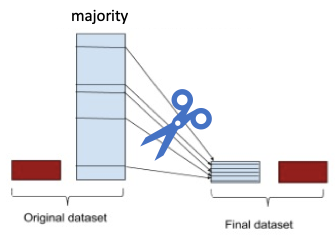

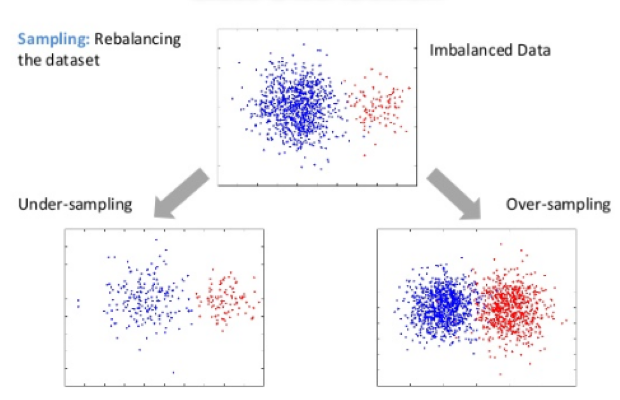

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [ ]:
# Step 1: Using Class Weights
# Calculate class weights

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
# Undersampling with class weights
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
model_rus = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_rus.fit(X_resampled_rus, y_resampled_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

### Tomek Links Sampling

Tomek Links Sampling is a powerful technique used in machine learning to address imbalanced datasets, particularly in binary classification problems. This technique focuses on identifying and removing Tomek links, which are pairs of instances from different classes that are nearest neighbors of each other. Removing Tomek links helps improve the separation between classes, thereby enhancing the performance of classifiers. In this detailed guide, we'll explore Tomek Links Sampling and its application in handling imbalanced data.

**Tomek Links:**
<ul>
  <li>Tomek links are pairs of instances, one from the majority class and the other from the minority class, that are closest to each other. In other words, they represent instances that are misclassified or potentially ambiguous in the feature space. By identifying and removing Tomek links, we can improve the separation between classes and reduce the influence of noisy or borderline instances.</li>
</ul>

**The Tomek Links Sampling Process:**

The Tomek Links Sampling process involves the following steps:

<ul>
  <li>Identifying Tomek links: Compute the distance between all pairs of instances in the dataset and identify pairs that form Tomek links.</li>
  <li>Removing Tomek links: Remove the instances that form Tomek links, typically by removing the instance from the majority class, as it is more likely to be misclassified.</li>
  <li>Refining the dataset: Optionally, refine the dataset further using additional sampling techniques or preprocessing steps to improve class separation.</li>
</ul>

**Example of Tomek Links Sampling:**

<ul>
  <li>Consider a dataset with a majority class (Class A) and a minority class (Class B). If there are instances from Class A that form Tomek links with instances from Class B, those links are identified and the instances from Class A are removed. This process effectively creates a clearer boundary between the two classes, reducing the influence of ambiguous instances and improving classifier performance.</li>
</ul>

Tomek Links Sampling is a valuable technique for handling imbalanced datasets by identifying and removing ambiguous instances that form Tomek links. By improving the separation between classes, Tomek Links Sampling enhances the performance of classifiers and mitigates the challenges associated with imbalanced data. However, it's essential to carefully evaluate the impact of Tomek Links Sampling on model performance and consider it as part of a broader strategy for handling imbalanced datasets.

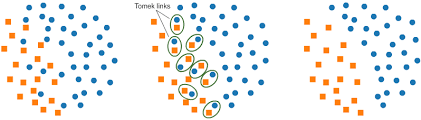

In [ ]:
from imblearn.under_sampling import  TomekLinks

In [ ]:
# Tomek Links Sampling with class weights
tl = TomekLinks()
X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)
model_tl = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_tl.fit(X_resampled_tl, y_resampled_tl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

### SMOTE

<ul>
  <li>SMOTE works by synthesizing new instances of the minority class based on the existing minority samples. Instead of simply duplicating existing samples, SMOTE creates synthetic samples by interpolating between minority class instances. This is achieved by selecting a minority class sample and computing the k-nearest neighbors (usually k=5) for that sample. A new synthetic instance is then generated by randomly selecting one of the k-nearest neighbors and creating a new point along the line segment joining the selected neighbor and the original sample.</li>
</ul>

**Importance of SMOTE:**
<ul>
  <li>The primary goal of SMOTE is to balance the class distribution within the dataset, making the learning task more fair and effective. By generating synthetic samples, SMOTE helps in expanding the feature space and capturing the underlying patterns of the minority class more effectively. This, in turn, reduces the risk of overfitting and improves the model's ability to generalize to unseen data.</li>
</ul>

**Advantages of SMOTE:**

<ol>
  <li>Addresses class imbalance by oversampling the minority class.</li>
  <li>Reduces the risk of overfitting by generating synthetic samples.</li>
  <li>Improves the performance of classifiers, especially for imbalanced datasets.</li>
  <li>Enhances the robustness and generalization ability of the learned model.</li>
</ol>

**Considerations and Parameters:**

<ul>
  <li>k-value: The number of nearest neighbors to consider when generating synthetic samples. Typically, a value of 5 is commonly used, but this can vary depending on the dataset.</li>
  <li>Minority class imbalance ratio: The ratio between the number of majority class samples and the number of minority class samples. This ratio can influence the effectiveness of SMOTE in rebalancing the dataset.</li>
</ul>

**Implementation of SMOTE:**

<ul>
  <li>To implement SMOTE in Python, you can use the SMOTE class from the imbalanced-learn library, which is commonly used for handling imbalanced datasets. </li>
</ul>

SMOTE is a valuable tool for handling imbalanced datasets by oversampling the minority class. By generating synthetic samples, SMOTE helps in rebalancing the class distribution and improving the performance of classifiers. When applied appropriately, SMOTE can significantly enhance the robustness and generalization ability of machine learning models, making it an indispensable technique in the field of imbalanced data handling.

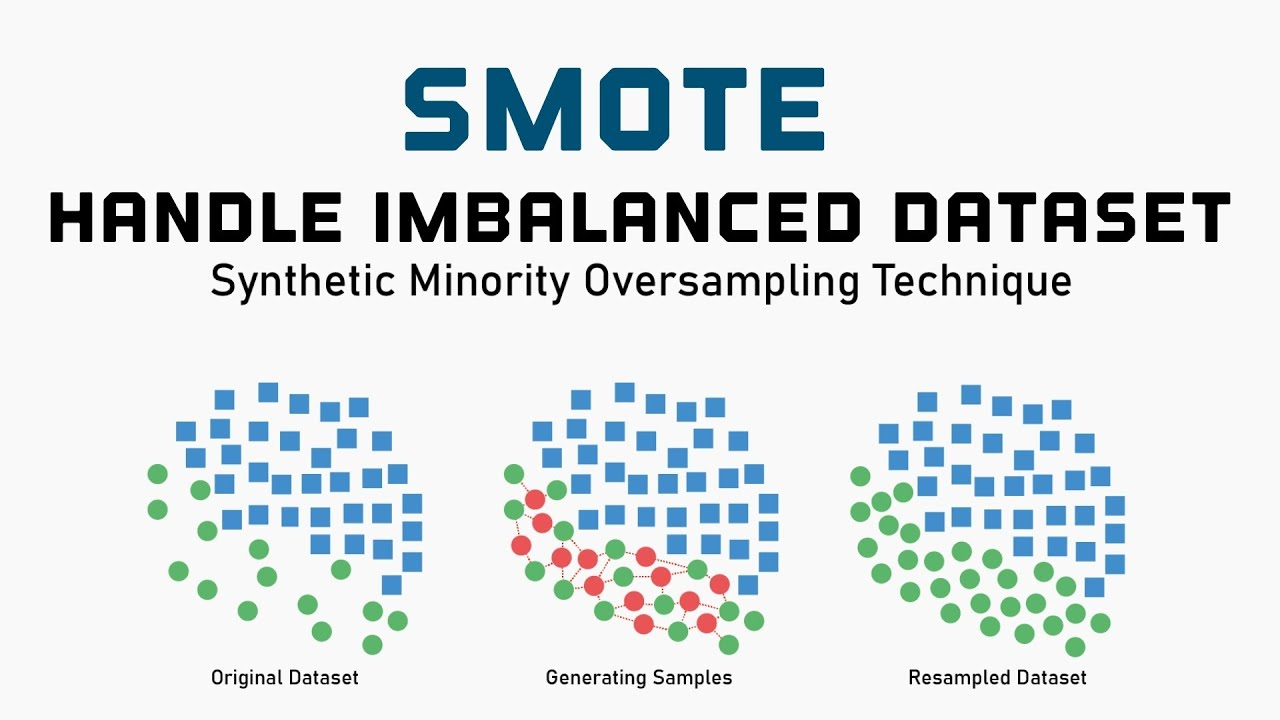

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE with class weights
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
model_smote = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_smote.fit(X_resampled_smote, y_resampled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

### ADASYN

Adaptive Synthetic Sampling (ADASYN) is a variant of the Synthetic Minority Over-sampling Technique (SMOTE) designed to handle imbalanced datasets by generating synthetic samples for the minority class.

<ul>
  <li>ADASYN is an oversampling technique used to address class imbalance in datasets, particularly in binary classification problems where one class significantly outnumbers the other.</li>
  <li>It focuses on generating synthetic samples for the minority class to balance the class distribution, thereby improving the performance of machine learning models trained on imbalanced data.</li>
  <li>In imbalanced datasets, conventional machine learning algorithms often struggle to learn from the minority class due to the unequal class distribution.</li>
  <li>ADASYN aims to alleviate this issue by adaptively adjusting the density of synthetic samples based on the local distribution of minority class instances, thereby focusing more on regions that are harder to learn.</li>
</ul>

**Key Features:**

<ul>
  <li>Adaptive Sampling: ADASYN adapts its sampling strategy based on the distribution of minority class instances. It generates more synthetic samples in regions where the class imbalance is higher, making it more effective than fixed sampling approaches.</li>
  <li>Local Neighbor Information: ADASYN considers the local neighborhood of each minority class instance to determine the density of synthetic samples to generate. This helps in preserving the local structure of the minority class distribution.</li>
</ul>

**Implementation:**

<ul>
  <li>ADASYN is available in Python through the imbalanced-learn library, similar to SMOTE.</li>
</ul>

**Advantages:**
<ul>
  <li>ADASYN is effective in generating synthetic samples that are more representative of the minority class distribution.</li>
  <li>It adapts dynamically to the local data density, making it suitable for datasets with varying degrees of class imbalance.</li>
</ul>

**Challenges:**

<ul>
  <li>Like other oversampling techniques, ADASYN may lead to overfitting if not applied carefully, particularly in cases where the minority class is inherently noisy or poorly defined.</li>
</ul>

ADASYN is a valuable tool for handling class imbalance in machine learning tasks, offering a more adaptive and data-driven approach compared to traditional oversampling methods. When used appropriately, it can significantly improve the performance of classifiers on imbalanced datasets.

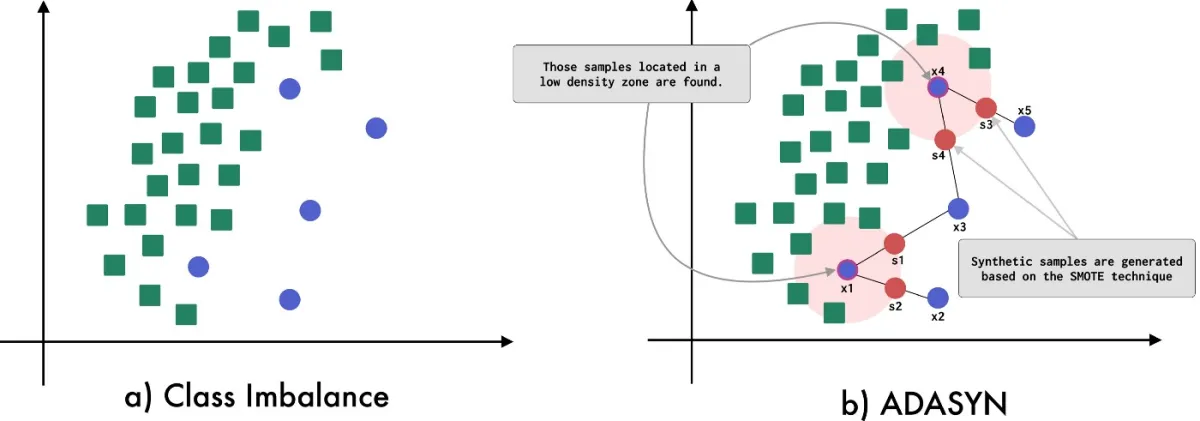

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
# ADASYN with class weights
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
model_adasyn = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

### SMOTE ENN

<ul>
  <li>SMOTE-ENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors) is a combination of oversampling and undersampling techniques designed to address class imbalance in datasets.</li>
  <li>SMOTE-ENN combines the strengths of SMOTE, an oversampling technique, with ENN (Edited Nearest Neighbors), an undersampling technique.</li>
  <li>It aims to address the class imbalance problem by generating synthetic samples for the minority class using SMOTE and then cleaning the resulting dataset using ENN.</li>
  <li>Imbalanced datasets can lead to biased models, where the minority class is often underrepresented and poorly learned by machine learning algorithms.</li>
  <li>SMOTE-ENN attempts to alleviate this issue by oversampling the minority class and removing noisy samples using ENN, thereby improving the overall model performance.</li>
</ul>

**Key Features:**

<ul>
  <li>Oversampling with SMOTE: SMOTE generates synthetic samples for the minority class by interpolating between existing minority class instances, thereby increasing the representation of the minority class.</li>
  <li>Undersampling with ENN: After oversampling with SMOTE, ENN is applied to remove potentially noisy samples by examining the nearest neighbors of each instance and removing those that are misclassified.</li>
</ul>

**Implementation:**

<ul>
  <li>SMOTE-ENN is available in Python through the imbalanced-learn library.</li>
</ul>

**Advantages:**

<ul>
  <li>SMOTE-ENN combines the benefits of oversampling and undersampling, effectively addressing both the overfitting and underfitting issues associated with imbalanced datasets.</li>
  <li>It can improve the generalization performance of classifiers by generating synthetic samples and cleaning noisy instances.</li>
</ul>

**Challenges:**

<ul>
  <li>The effectiveness of SMOTE-ENN depends on the choice of parameters and the characteristics of the dataset. Tuning parameters such as the number of neighbors for SMOTE and ENN is crucial for optimal performance.</li>
  <li>SMOTE-ENN may be computationally expensive, especially for large datasets, due to the combination of oversampling and undersampling steps.</li>
</ul>

SMOTE-ENN is a powerful technique for handling class imbalance in machine learning tasks. By combining oversampling with SMOTE and undersampling with ENN, it offers a balanced approach to addressing the challenges posed by imbalanced datasets, leading to more robust and reliable models.

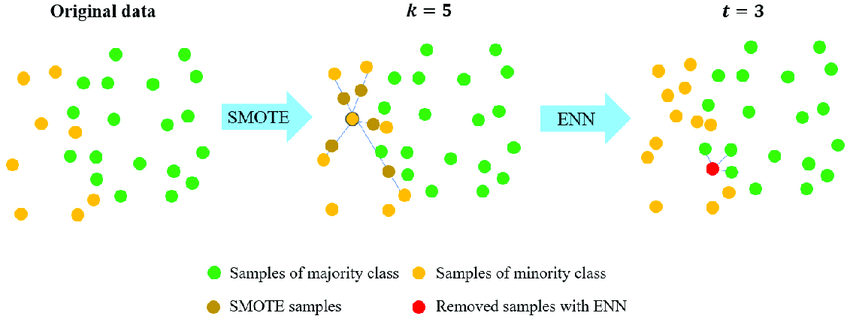

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
# SMOTE ENN with class weights
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_train, y_train)
model_smoteenn = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_smoteenn.fit(X_resampled_smoteenn, y_resampled_smoteenn)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

### SMOTE TOMEK

<ul>
  <li>SMOTE (Synthetic Minority Over-sampling Technique) combined with Tomek Links is a strategy utilized to address class imbalance in datasets.</li>
  <li>SMOTE is an oversampling technique designed to balance class distributions by generating synthetic samples for the minority class.</li>
  <li>Tomek Links, on the other hand, is an undersampling method used to identify and remove noisy or borderline instances from the dataset.</li>
  <li>The combination of SMOTE with Tomek Links aims to enhance the effectiveness of oversampling while simultaneously removing potentially noisy instances from the dataset.</li>
  <li>Class imbalance in datasets often leads to biased models, where the minority class is inadequately represented and learned by machine learning algorithms.</li>
  <li>By leveraging SMOTE to generate synthetic samples for the minority class and Tomek Links to eliminate potentially noisy instances, SMOTE + Tomek Links seeks to improve model performance.</li>
</ul>

**Key Features:**

<ul>
  <li>Oversampling with SMOTE: SMOTE synthesizes new minority class instances by interpolating between existing minority class samples, thereby augmenting the representation of the minority class.</li>
  <li>Undersampling with Tomek Links: Tomek Links identifies pairs of instances—one from the minority class and one from the majority class—that are nearest neighbors with different class labels. These instances are deemed potentially noisy and are consequently removed from the dataset.</li>
</ul>

**Implementation:**

<ul>
  <li>The implementation of SMOTE + Tomek Links can be facilitated using the imbalanced-learn library in Python.</li>
</ul>


**Advantages:**

<ul>
  <li>SMOTE + Tomek Links combines the strengths of oversampling and undersampling, effectively mitigating both overfitting and underfitting issues associated with imbalanced datasets.</li>
  <li>By generating synthetic samples and removing noisy instances, SMOTE + Tomek Links can enhance the generalization performance of classifiers.</li>
</ul>

**Challenges:**

<ul>
  <li>The effectiveness of SMOTE + Tomek Links hinges on parameter selection and dataset characteristics. Optimal performance necessitates fine-tuning parameters such as the number of neighbors for SMOTE and the distance metric for Tomek Links.</li>
  <li>Computational expenses may arise, particularly for large datasets, due to the combined oversampling and undersampling steps.</li>
</ul>

SMOTE + Tomek Links presents a robust approach to addressing class imbalance in machine learning tasks. By synergistically combining oversampling with SMOTE and undersampling with Tomek Links, it offers a balanced solution to the challenges posed by imbalanced datasets, resulting in more reliable and resilient models.

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# SMOTE TOMEK with class weights
smotetomek = SMOTETomek(random_state=42)
X_resampled_smotetomek, y_resampled_smotetomek = smotetomek.fit_resample(X_train, y_train)
model_smotetomek = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model_smotetomek.fit(X_resampled_smotetomek, y_resampled_smotetomek)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.506577103766587, 1: 38.51065162907268})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score

# Function to evaluate a model and print its performance metrics
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)  # Calculate balanced accuracy
    conf_mat = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Balanced Accuracy:", balanced_acc)  # Print balanced accuracy
    print("Confusion Matrix:\n", conf_mat)

# Evaluate each model
print("Evaluation results for Undersampling:")
evaluate_model(model_rus, X_test, y_test)

print("\nEvaluation results for Tomek Links Sampling:")
evaluate_model(model_tl, X_test, y_test)

print("\nEvaluation results for SMOTE:")
evaluate_model(model_smote, X_test, y_test)

print("\nEvaluation results for ADASYN:")
evaluate_model(model_adasyn, X_test, y_test)

print("\nEvaluation results for SMOTE ENN:")
evaluate_model(model_smoteenn, X_test, y_test)

print("\nEvaluation results for SMOTE TOMEK:")
evaluate_model(model_smotetomek, X_test, y_test)

Evaluation results for Undersampling:
Accuracy: 0.15234934270467265
Precision: 0.01269093396154723
Recall: 0.835
F1 Score: 0.025001871397559702
Balanced Accuracy: 0.48917348015297374
Confusion Matrix:
 [[ 2174 12992]
 [   33   167]]

Evaluation results for Tomek Links Sampling:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9869842509436418
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
 [[15166     0]
 [  200     0]]

Evaluation results for SMOTE:
Accuracy: 0.4358974358974359
Precision: 0.013445185014939095
Recall: 0.585
F1 Score: 0.026286227813974387
Balanced Accuracy: 0.5094655809046551
Confusion Matrix:
 [[6581 8585]
 [  83  117]]

Evaluation results for ADASYN:
Accuracy: 0.9357021996615905
Precision: 0.01715686274509804
Recall: 0.07
F1 Score: 0.02755905511811024
Balanced Accuracy: 0.5085592773308717
Confusion Matrix:
 [[14364   802]
 [  186    14]]

Evaluation results for SMOTE ENN:
Accuracy: 0.691787062345438
Precision: 0.0137221269296741
Recall: 0.32
F1 Score: 0.02631578947368421
Balanced Accuracy: 0.5083449821970196
Confusion Matrix:
 [[10566  4600]
 [  136    64]]

Evaluation results for SMOTE TOMEK:
Accuracy: 0.019979174801509826
Precision: 0.012979351032448377
Recall: 0.99
F1 Score: 0.025622775800711747
Balanced Accuracy: 0.498593564552288
Confusio